# Time Series Momentum Trading Strategy 
                - Buys and hold a stock if the return over a given window is positive
                - Sell when the return over said window becomes negative
                 

## Libraries + Setup

##### Libraries and set start Date

In [1]:
import pandas as pd
from pandas.tseries.offsets import DateOffset #for when you need to offset dates in time series
import numpy as np
import yfinance as yf

In [1]:
start = '2020-01-01'
Ticker = 'AAPL'
window = 15

### The Import

In [6]:
df = yf.download(Ticker,start)

[*********************100%%**********************]  1 of 1 completed


## Strategy Operation
    working with Log_returns to make returns time addative:
        100 to 150 to 100 = cumulative return of 0 rather than 
        some small positive seen with regular returns
1) calculate log returns and make a column for it
2) make a rolling cumulative return column. rolling for the window 
   given by user
3) Create a position tracker: go long if rolling cumulative return column is positive, go short if negative
4) Compute Strategy Returns: log_rets * position shifted forward as that is the earliest investor can respond. [no forward looking bias]
5) Convert to standard returns using exponetial function to 'undo' log

* correction for taking multiple longs or shorts if return stays on eaither side??
* trading everyday with this strategy
    * boolean mask like from SNP project shoudld fix this

    

In [7]:
def strategy(df, window=1):     
    df = df.copy()       #creating a copy of the imported df as to not mess with it
    df['logrets'] = np.log(df['Close'].pct_change()+1) 
    df['prior_n'] = df['logrets'].rolling(window).sum() #would be prod if it was cross sectional analysis but since its log returns we can jsut add
    df.dropna(inplace = True)
    df['Position'] = [1 if i >0 else -1 for i in df['prior_n']] #if the rolling return is +ve i.e. up momentum then buy. if -ve i.e. down momentum then sell
                                                                #if you want no short positions change to esle 0
    df['Stratret'] = df['Position'].shift(1) * df['logrets'] #shift position by 1 to account for forward looking bias. i.e. you cannot act on a signal in the same period 
                                                        # of it occuring. earlies is in the next.
    return  np.exp(df[['logrets','Stratret']].cumsum()).plot(figsize= (12,6))

<Axes: xlabel='Date'>

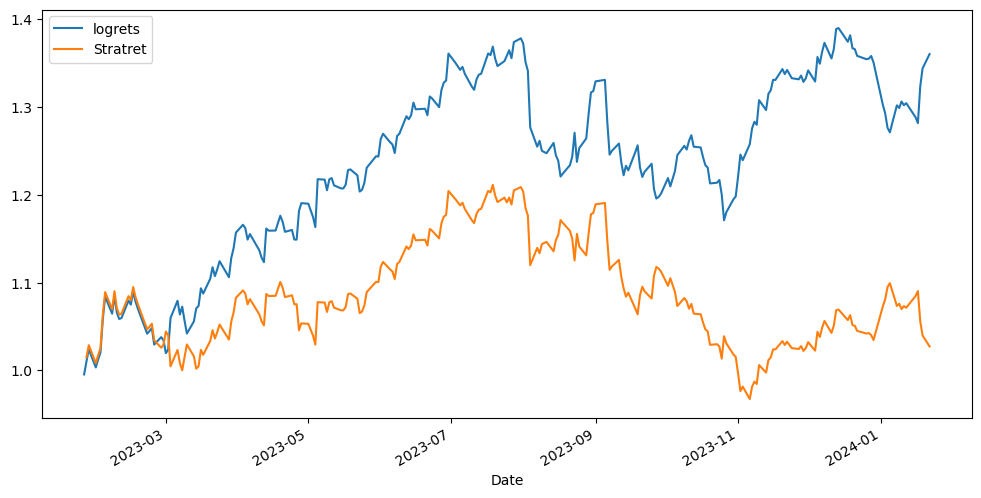

In [11]:
strategy(df,window) #the longer the window, generally, the better the startegy performs
#likely because trades become less frequent and sensitive to insignificant momentum changes 

#window essentially measures the stregth of the momentum factor, the lower the number the lower the number periods considered to constiture a trend